In [1]:
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import scipy.stats as stats
import probscale

# Reading csv file and converting into DataFrame

In [4]:
with open('C:\\data set.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

In [5]:
# Each row is a list containing a single string
data[:5]

[['age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"'],
 ['56;"housemaid";"married";"basic.4y";"no";"no";"no";"telephone";"may";"mon";261;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"'],
 ['57;"services";"married";"high.school";"unknown";"no";"no";"telephone";"may";"mon";149;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"'],
 ['37;"services";"married";"high.school";"no";"yes";"no";"telephone";"may";"mon";226;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"'],
 ['40;"admin.";"married";"basic.6y";"no";"no";"no";"telephone";"may";"mon";151;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"']]

In [6]:
# Transform the list of lists into a single list of strings to facilitate data wrangling
data2 = [row[0] for row in data]

In [7]:
data2[:5]

['age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"',
 '56;"housemaid";"married";"basic.4y";"no";"no";"no";"telephone";"may";"mon";261;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"',
 '57;"services";"married";"high.school";"unknown";"no";"no";"telephone";"may";"mon";149;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"',
 '37;"services";"married";"high.school";"no";"yes";"no";"telephone";"may";"mon";226;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"',
 '40;"admin.";"married";"basic.6y";"no";"no";"no";"telephone";"may";"mon";151;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"']

In [8]:
# Split each string into the various columns
data3 = [i.split(";") for i in data2]
data3[0:3]

[['age',
  '"job"',
  '"marital"',
  '"education"',
  '"default"',
  '"housing"',
  '"loan"',
  '"contact"',
  '"month"',
  '"day_of_week"',
  '"duration"',
  '"campaign"',
  '"pdays"',
  '"previous"',
  '"poutcome"',
  '"emp.var.rate"',
  '"cons.price.idx"',
  '"cons.conf.idx"',
  '"euribor3m"',
  '"nr.employed"',
  '"y"'],
 ['56',
  '"housemaid"',
  '"married"',
  '"basic.4y"',
  '"no"',
  '"no"',
  '"no"',
  '"telephone"',
  '"may"',
  '"mon"',
  '261',
  '1',
  '999',
  '0',
  '"nonexistent"',
  '1.1',
  '93.994',
  '-36.4',
  '4.857',
  '5191',
  '"no"'],
 ['57',
  '"services"',
  '"married"',
  '"high.school"',
  '"unknown"',
  '"no"',
  '"no"',
  '"telephone"',
  '"may"',
  '"mon"',
  '149',
  '1',
  '999',
  '0',
  '"nonexistent"',
  '1.1',
  '93.994',
  '-36.4',
  '4.857',
  '5191',
  '"no"']]

In [9]:
# Place the lists into a DataFrame with the first list as the headings
df = pd.DataFrame(data3[1:], columns=data3[0])

In [10]:
df.head(5)

,age,"""job""","""marital""","""education""","""default""","""housing""","""loan""","""contact""","""month""","""day_of_week""",...,"""campaign""","""pdays""","""previous""","""poutcome""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""euribor3m""","""nr.employed""","""y"""
0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""


# Cleaning up DataFrame

In [11]:
df.columns = df.columns.str.strip('""')

In [12]:
df = df.apply(lambda x: x.str.strip('""'))

In [13]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [14]:
df.shape

(41188, 21)

In [15]:
# 12 duplicate observations in the dataset, which I will delete
duplicates = df[df.duplicated()]
duplicates

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.2,-42,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [16]:
df.drop_duplicates(inplace = True) 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             41176 non-null  object
 1   job             41176 non-null  object
 2   marital         41176 non-null  object
 3   education       41176 non-null  object
 4   default         41176 non-null  object
 5   housing         41176 non-null  object
 6   loan            41176 non-null  object
 7   contact         41176 non-null  object
 8   month           41176 non-null  object
 9   day_of_week     41176 non-null  object
 10  duration        41176 non-null  object
 11  campaign        41176 non-null  object
 12  pdays           41176 non-null  object
 13  previous        41176 non-null  object
 14  poutcome        41176 non-null  object
 15  emp.var.rate    41176 non-null  object
 16  cons.price.idx  41176 non-null  object
 17  cons.conf.idx   41176 non-null  object
 18  euribo

# Numeric data analysis

In [18]:
# Converting the numeric data
cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
        'cons.conf.idx', 'euribor3m', 'nr.employed']

In [19]:
df[cols] = df[cols].astype('float')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  float64
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  float64
 11  campaign        41176 non-null  float64
 12  pdays           41176 non-null  float64
 13  previous        41176 non-null  float64
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [21]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [22]:
# The max 'duration' value seems incredible. Let's see how many people spoke for more than 1 hour to check if... 
# there are possible errors in the dataset.
# Well, the other variables' values seem fine, so it looks legit.
df[['age', 'job', 'education', 'duration', 'campaign', 'marital', 'y']][df.duration > 3600]

,age,job,education,duration,campaign,marital,y
7727,37.0,unemployed,professional.course,3631.0,2.0,married,yes
13820,31.0,technician,professional.course,3643.0,1.0,married,yes
22192,52.0,blue-collar,basic.4y,4199.0,3.0,married,yes
24091,33.0,technician,professional.course,4918.0,1.0,single,no
40537,27.0,admin.,high.school,3785.0,1.0,single,no


#### All the numeric variables look fine, except for 'pdays' with the max reading of 999

In [23]:
# 999 should perhaps be encoded as 0 instead
df.pdays.unique()

array([999.,   6.,   4.,   3.,   5.,   1.,   0.,  10.,   7.,   8.,   9.,
        11.,   2.,  12.,  13.,  14.,  15.,  16.,  21.,  17.,  18.,  22.,
        25.,  26.,  19.,  27.,  20.])

In [24]:
# Overwhelming majority of clients in dataset have never been contacted before
df.pdays.value_counts()

999.0    39661
3.0        439
6.0        412
4.0        118
9.0         64
2.0         61
7.0         60
12.0        58
10.0        52
5.0         46
13.0        36
11.0        28
1.0         26
15.0        24
14.0        20
8.0         18
0.0         15
16.0        11
17.0         8
18.0         7
19.0         3
22.0         3
21.0         2
27.0         1
25.0         1
20.0         1
26.0         1
Name: pdays, dtype: int64

In [25]:
# Transforming the 'pdays' variable's 999 values
df['pdays'] = df.pdays.map(lambda x: 0 if x == 999 else x)

In [26]:
df.pdays.describe()

count    41176.000000
mean         0.221294
std          1.349065
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         27.000000
Name: pdays, dtype: float64

In [27]:
# Somewhat more contact history in 'previous' than in 'pdays'
df.previous.value_counts()

0.0    35551
1.0     4561
2.0      754
3.0      216
4.0       70
5.0       18
6.0        5
7.0        1
Name: previous, dtype: int64

## Target variable

In [28]:
# Binary target variable
df.y.value_counts()

no     36537
yes     4639
Name: y, dtype: int64

In [29]:
# Changing the target variable into numeric
df['target'] = df.y.map(lambda x: 1 if x == 'yes' else 0)

In [30]:
df.target[df.target == 1].count()/df.target.count()

0.11266271614532737

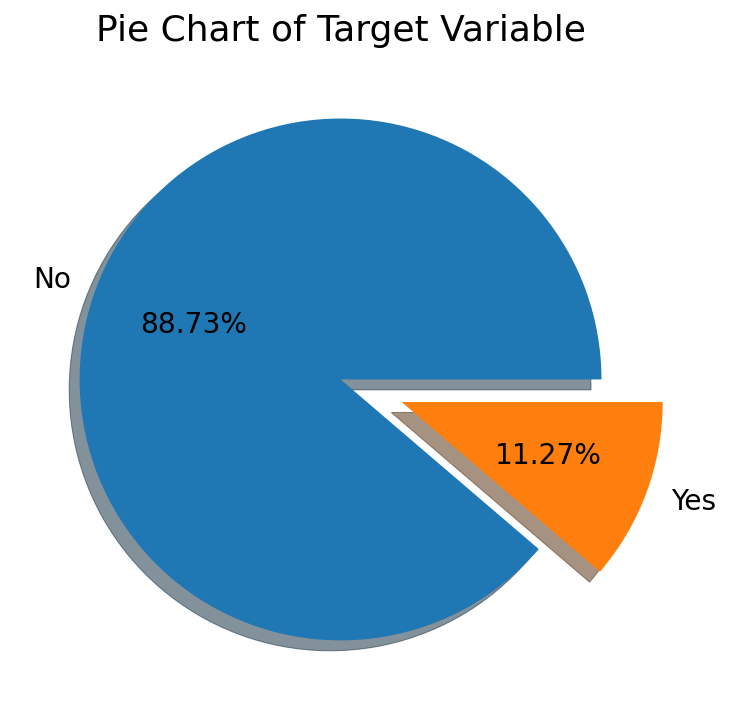

In [31]:
# Pie chart of the target variable

target_labels = 'No', 'Yes'
target_counts = [df.target[df.target==0].count(), df.target[df.target==1].count()]

explode = (0, 0.25)

plt.figure(figsize=(6,6))
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

target_pie = plt.pie(target_counts, labels=target_labels, explode=explode, autopct='%1.2f%%', 
                     textprops={'fontsize': 14}, shadow=True, colors=colors)
plt.title('Pie Chart of Target Variable', fontsize=18)
plt.show()


Marketing success rate is **11.27%**. So this is an **imbalanced** dataset.

In [32]:
df.drop(['y'], axis=1, inplace=True)

## Correlations

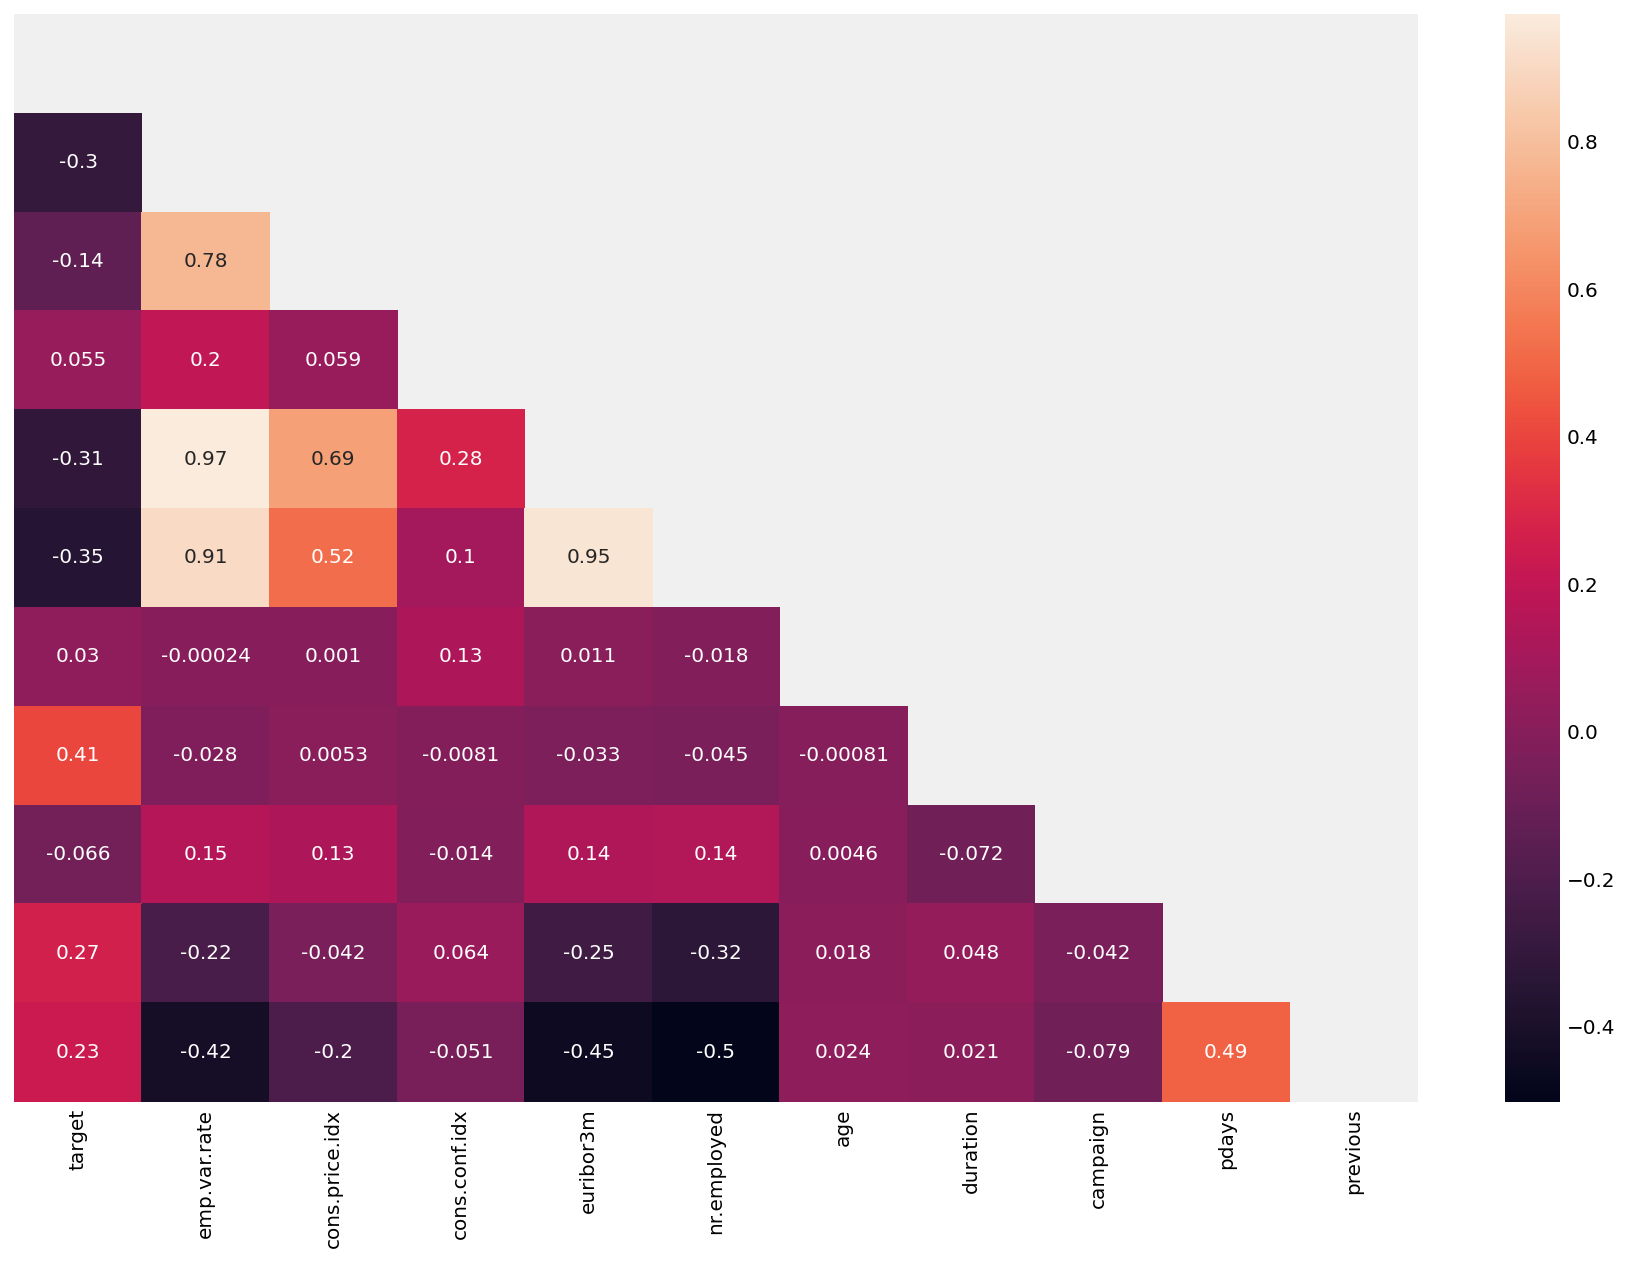

In [33]:
# Take a look at the correlation matrix for the numeric variables
M = df[['target', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'age', 'duration', 'campaign', 'pdays', 'previous']]

fig, ax = plt.subplots(figsize=(14, 10))

mask = np.zeros_like(M.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(M.corr(), mask=mask, annot=True, ax=ax)
ax.set_yticks(np.arange(0, df.shape[1])+0.1)
ax.set_ylim([M.shape[1], 0])
plt.show()

**Very high positive correlation** (at over 0.90) between many of the **macroeconomic variables**, especially **'emp.var.rate', 'nr.employed' &  'euribor3m'**. Using just one of them is advisable to minimise multicollinearity. Best to use **'euribor3m'** as the level of the risk-free interest rate is likely to affect people's propensity to take up bank term deposits. The level of the inflation index, **'cons.price.idx'**, is also highly correlated to **'euribor3m'**, which is expected. But **'cons.conf.idx'** is not as well correlated with the others. So let's pick **'euribor3m' and 'cons.conf.idx'** as potential **explanatory variables** from among the **macroeconomic variables**.

**'pdays'** has moderate positive correlation with **'target'**, meaning if the client had been contacted in a previous campaign, the more days that has passed since until the latest (current) campaign contact raise the probability of a successful subscription. **'previous'** also has a moderate positive correlation, so the more contacts with the client before the latest campaign raises the probability of a subscription. There is a relatively high correlation between **'pdays' and 'previous'** (at +0.49), and I will therefore just use the **'previous'** variable because it has more observations of client contact. Interestingly, **'campaign'**, which is the number of contacts during the current campaign, had little correlation to the subscription success rate.

**'duration'** of the phone conversation in the current campaign has the highest correlation to **'target'**, and is positive, meaning that the longer the phone conversation with the client in this current campaign, the higher the probability of a successful subscription. Naturally, an interested client will be more willing to discuss taking up term deposits, and such a client will also be more likely to actually subscribe ultimately. A commercial-minded predictive model should probably **not include 'duration'** because it is a variable whose outcome cannot be estimated **independently of the target variable beforehand**. 

The alternative argument is that **'duration'** might reflect the caller's ability to engage the client, which would then lead to a higher probability of a subscription. But if this view is valid, then it is better to use a variable that measures a caller's ability directly, perhaps the caller's success rate in previous campaigns. I think that a realistic predictive model should **exclude the 'duration' variable**.

In [34]:
# Let's look at some summary statistics for 'duration'
# The two distributions between target=1 and target=0 are different
df.groupby('target')['duration'].agg(['mean', 'std', 'count'])

,mean,std,count
target,,,
0,220.868079,207.116178,36537
1,553.256090,401.190736,4639


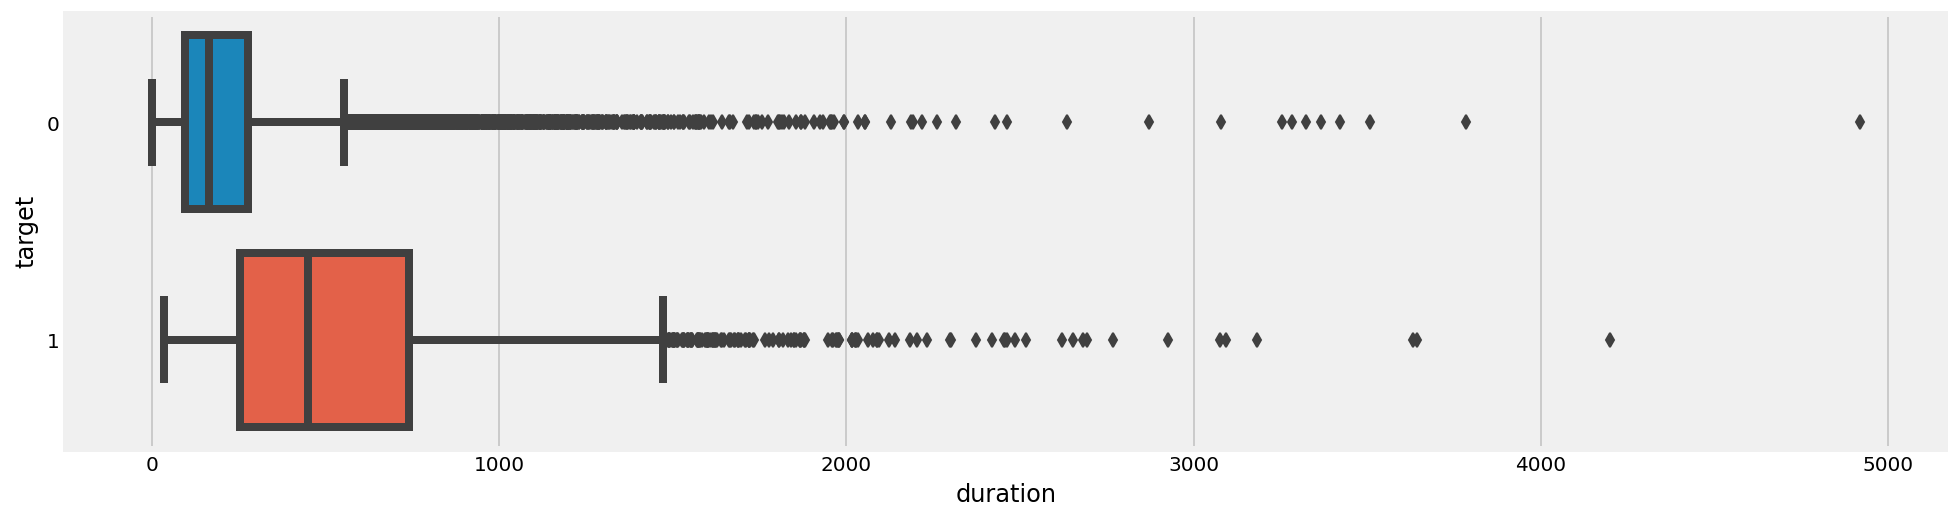

In [35]:
plt.figure(figsize=(15,4))
sns.boxplot(x='duration', y='target', data=df, orient='h');

In [36]:
# t-test shows that the two distributions of 'duration' are statistically distinct from each other
stats.ttest_ind(df.duration[df.target == 0], df.duration[df.target == 1])

Ttest_indResult(statistic=-89.96034866049264, pvalue=0.0)

# Non-numeric variables

## _job_ variable

In [37]:
df.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [38]:
job_proportion = ((df.target[df.target == 1].groupby(df.job).count())/
                  (df.target.groupby(df.job).count()))*100

In [39]:
# Subscription success rates by job category
job_proportion

job
admin.           12.966695
blue-collar       6.895061
entrepreneur      8.516484
housemaid        10.000000
management       11.217510
retired          25.261932
self-employed    10.485574
services          8.142173
student          31.428571
technician       10.832468
unemployed       14.201183
unknown          11.212121
Name: target, dtype: float64

**'blue-collar'** has notably the lowest success rate, while **'student' and 'retired'** have notably higher sucess rates, along with **'unemployed'** as a distant third. Probably useful to use these four job categories as **dummies** in the model.

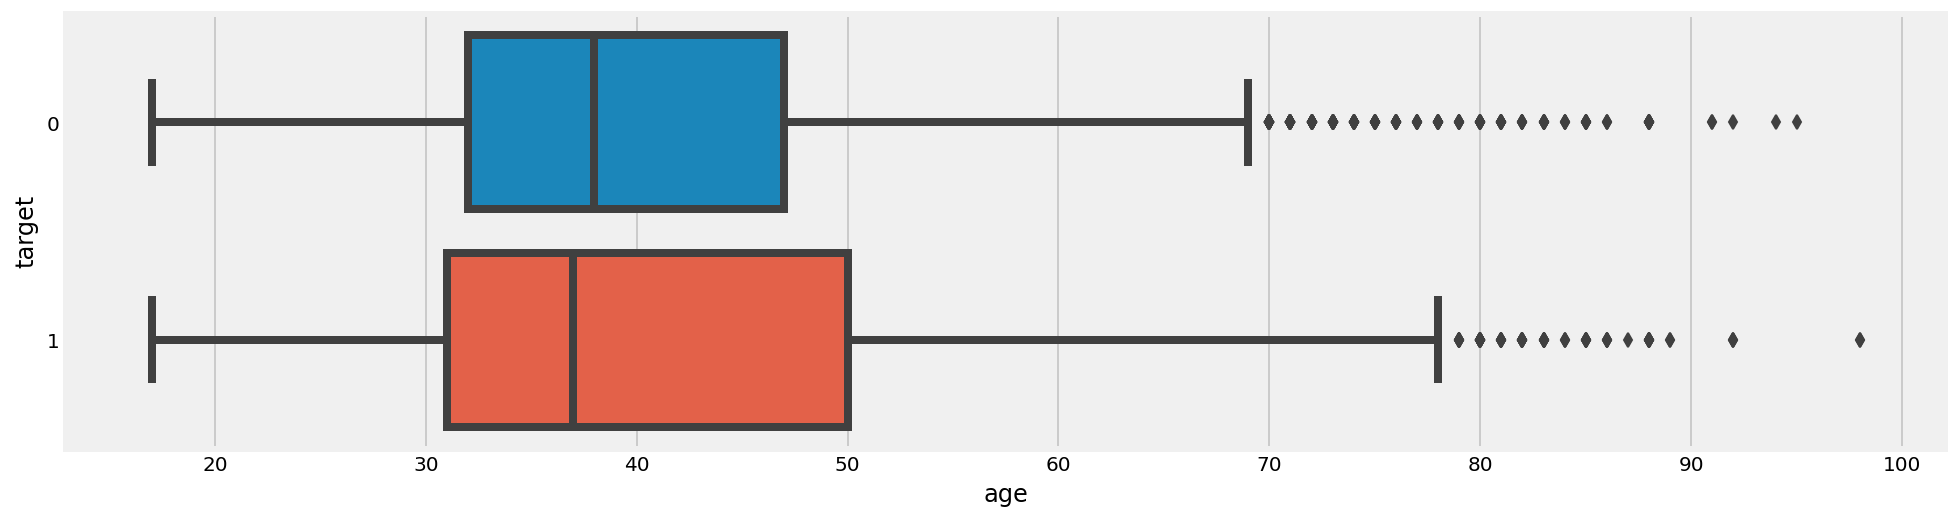

In [40]:
# There appears to be a greater success rate among older clients
plt.figure(figsize=(15,4))
sns.boxplot(x='age', y='target', data=df, orient='h');

In [41]:
# There is little correlation between the success rate and age for the overall dataset
df.age.corr(df.target)

0.030380536219875947

In [42]:
# But there is a good positive correlation between age and the success rate among retirees
df['age'][df.job == 'retired'].corr(df.target)

0.3450014260768637

In [43]:
# Also a decent negative correlation between age and the success rate among student
df['age'][df.job == 'student'].corr(df.target)

-0.14858666506737792

In [44]:
# No such pattern among the unemployed...
df['age'][df.job == 'unemployed'].corr(df.target)

-0.02948258934812092

In [45]:
# nor among blue-collar workers
df['age'][df.job == 'blue-collar'].corr(df.target)

-0.010950005078692829

The use of **interaction variables** between job dummies for **'retired' and 'student' and 'age'** could prove fruitful for predicting success.

## _education_ variable

In [46]:
df.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [47]:
edu_proportion = ((df.target[df.target == 1].groupby(df.education).count())/
                  (df.target.groupby(df.education).count()))*100

In [48]:
# Subscription success rates by education category
edu_proportion

education
basic.4y               10.249042
basic.6y                8.206024
basic.9y                7.824648
high.school            10.838940
illiterate             22.222222
professional.course    11.354962
university.degree      13.720816
unknown                14.508671
Name: target, dtype: float64

**'basic.9y' and 'basic.4y'** have notably the lowest success rates, while **'illiterate'** have notably the highest success rate. **'university' and 'unknown'** also have high sucess rates. Probably useful to use these four job categories as **dummies** in the model.

In [49]:
edu_student = ((df.job[df.job == 'student'].groupby(df.education).count())/
               (df.job.groupby(df.education).count()))*100

In [50]:
# Although job==student is well-represented among the education=unknown group, it’s still less than 10%, 
# so 'unknown' is not synonymous with 'student'
edu_student

education
basic.4y               0.622605
basic.6y               0.567438
basic.9y               1.637717
high.school            3.753154
illiterate                  NaN
professional.course    0.820611
university.degree      1.397567
unknown                9.653179
Name: job, dtype: float64

In [51]:
edu_retired = ((df.job[df.job == 'retired'].groupby(df.education).count())/
               (df.job.groupby(df.education).count()))*100

In [52]:
# job==retired is well-represented among education==illiterate
edu_retired

education
basic.4y               14.295977
basic.6y                3.273680
basic.9y                2.398677
high.school             2.901598
illiterate             16.666667
professional.course     4.599237
university.degree       2.334758
unknown                 5.606936
Name: job, dtype: float64

In [53]:
edu_blue = ((df.job[df.job == 'blue-collar'].groupby(df.education).count())/
            (df.job.groupby(df.education).count()))*100

In [54]:
# job==blue-collar is heavily represented among 'basic' education categories, which help explain their low rates
# but interesting that blue-collar is also a large proportion of education==illiterate, but it has high rates
edu_blue

education
basic.4y               55.507663
basic.6y               62.199913
basic.9y               59.933830
high.school             9.230446
illiterate             44.444444
professional.course     8.645038
university.degree       0.772772
unknown                26.242775
Name: job, dtype: float64

In [55]:
df['age'][df.education == 'basic.4y'].corr(df.target)

0.2961483449480948

In [56]:
df['age'][df.education == 'illiterate'].corr(df.target)

0.16332150908843854

Let's set **dummy variables** for
+ 'illiterate', 
+ 'unknown', 
+ 'university.degree', and 
+ a combined 'basic.6y' with 'basic.9y'**

Then **interactive dummies** between **'age' and 'basic.4y' & 'age' and 'illiterate'**

## _poutcome_ & _marital_ variables

In [57]:
df.poutcome.value_counts()

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

In [58]:
poutcome_proportion = ((df.target[df.target == 1].groupby(df.poutcome).count())/
                      (df.target.groupby(df.poutcome).count()))*100

In [59]:
# Previous success in marketing campaign is linked powerfully to subsequent success, and
# even previous contact but failure has an above-sample success rate
poutcome_proportion

poutcome
failure        14.228598
nonexistent     8.832382
success        65.112891
Name: target, dtype: float64

In [60]:
df['age'][df.poutcome == 'success'].corr(df.target)

0.07478009748710428

In [61]:
df.marital.value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

In [62]:
marital_proportion = ((df.target[df.target == 1].groupby(df.marital).count())/
                      (df.target.groupby(df.marital).count()))*100

In [63]:
# 'single' category has notably higher subscription rate, so let's have a dummy for that
marital_proportion

marital
divorced    10.323140
married     10.156093
single      14.008993
unknown     15.000000
Name: target, dtype: float64

## miscellaneous variables

In [64]:
# Extremely few cases of defaults
df.default.value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

In [65]:
default_proportion = ((df.target[df.target == 1].groupby(df.default).count())/
                      (df.target.groupby(df.default).count()))*100

In [66]:
# Let's have a dummy variable for no defaults
default_proportion

default
no         12.880253
unknown     5.153560
yes              NaN
Name: target, dtype: float64

In [67]:
df.housing.value_counts()

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

In [68]:
housing_proportion = ((df.target[df.target == 1].groupby(df.housing).count())/
                      (df.target.groupby(df.housing).count()))*100

In [69]:
housing_proportion

housing
no         10.878324
unknown    10.808081
yes        11.622085
Name: target, dtype: float64

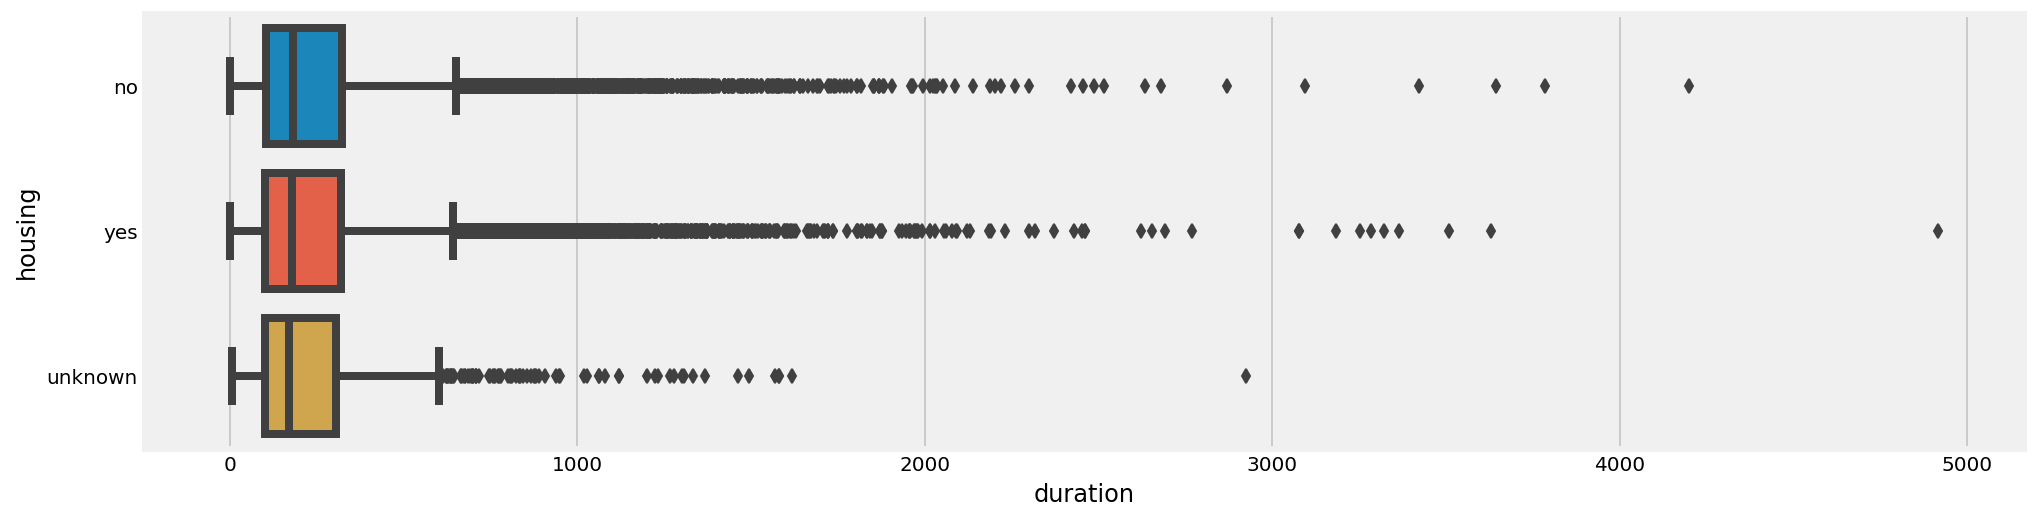

In [70]:
# Using 'duration' as a continuous proxy for the target variable, we see little discernible difference in the... 
# housing loan distributions
plt.figure(figsize=(15,4))
sns.boxplot(x='duration', y='housing', data=df, orient='h');

In [71]:
# Extremely few cases of defaults
df.loan.value_counts()

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

In [72]:
loan_proportion = ((df.target[df.target == 1].groupby(df.loan).count())/
                   (df.target.groupby(df.loan).count()))*100

In [73]:
# No discernible effect from 'loan' variable
loan_proportion

loan
no         11.341269
unknown    10.808081
yes        10.931498
Name: target, dtype: float64

So we've identified the following potential **explanatory variables**: 
+ 'euribor3m', 
+'cons.conf.idx', 
+'age', 
+blue-collar (age) dummy, 
+student (job) dummy, 
+retired (job) dummy, 
+unemployed (job) dummy, 
+illiterate (education) dummy,
+unknown (education) dummy,
+university (education) dummy,
+basic.4y (education) dummy,
+combined basic.6y & basic.9y (education) dummy,
+retired-age interaction variable, 
+student-age interaction variable,
+basic.4y-age interaction variable,
+illiterate-age interaction variable,
+marital single dummy, 
+no credit default dummy.

# Feature engineering

### Creating new variables, mostly dummy variables

In [74]:
# Creating a dummy variable for blue-collar workers
df['blue_collar'] = df.job.apply(lambda x: 1 if x=='blue-collar' else 0)

In [75]:
# Creating a dummy variable for students
df['student'] = df.job.apply(lambda x: 1 if x=='student' else 0)

In [76]:
# Creating a dummy variable for retirees
df['retiree'] = df.job.apply(lambda x: 1 if x=='retired' else 0)

In [77]:
# Creating a dummy variable for unemployed
df['unemployed'] = df.job.apply(lambda x: 1 if x=='unemployed' else 0)

In [78]:
# Creating a dummy variable for illiterate
df['illiterate'] = df.education.apply(lambda x: 1 if x=='illiterate' else 0)

In [79]:
# Creating a dummy variable for unknown
df['unknown_edu'] = df.education.apply(lambda x: 1 if x=='unknown' else 0)

In [80]:
# Creating a dummy variable for university degree
df['university'] = df.education.apply(lambda x: 1 if x=='university.degree' else 0)

In [81]:
# Creating a dummy variable for basic.4y
df['basic4'] = df.education.apply(lambda x: 1 if x=='basic.4y' else 0)

In [82]:
# Creating a dummy variable for basic.6y & basic.9y together
df['basic_other'] = df.education.apply(lambda x: 1 if x=='basic.6y' or x=='basic.9y' else 0)

In [83]:
# Creating a dummy variable for singles
df['single'] = df.marital.apply(lambda x: 1 if x=='single' else 0)

In [84]:
# Creating a dummy variable for no credit default
df['no_default'] = df.default.apply(lambda x: 1 if x=='no' else 0)

In [85]:
df['age_retiree'] = df.age*df.retiree

In [86]:
df['age_student'] = df.age*df.student

In [87]:
df['age_basic4'] = df.age*df.basic4

In [88]:
df['age_illiterate'] = df.age*df.illiterate

In [89]:
df[['blue_collar', 'student', 'retiree', 'unemployed', 'illiterate', 'unknown_edu', 'university', 'basic4', 
    'basic_other', 'single', 'no_default']].describe()

,blue_collar,student,retiree,unemployed,illiterate,unknown_edu,university,basic4,basic_other,single,no_default
count,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,0.224718,0.021250,0.041723,0.024626,0.000437,0.042015,0.295415,0.101418,0.202448,0.280843,0.791165
std,0.417402,0.144219,0.199959,0.154984,0.020904,0.200625,0.456235,0.301885,0.401829,0.449417,0.406481
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
# Numbers above for the job dummies align, so the dummification was correct
df.job.value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

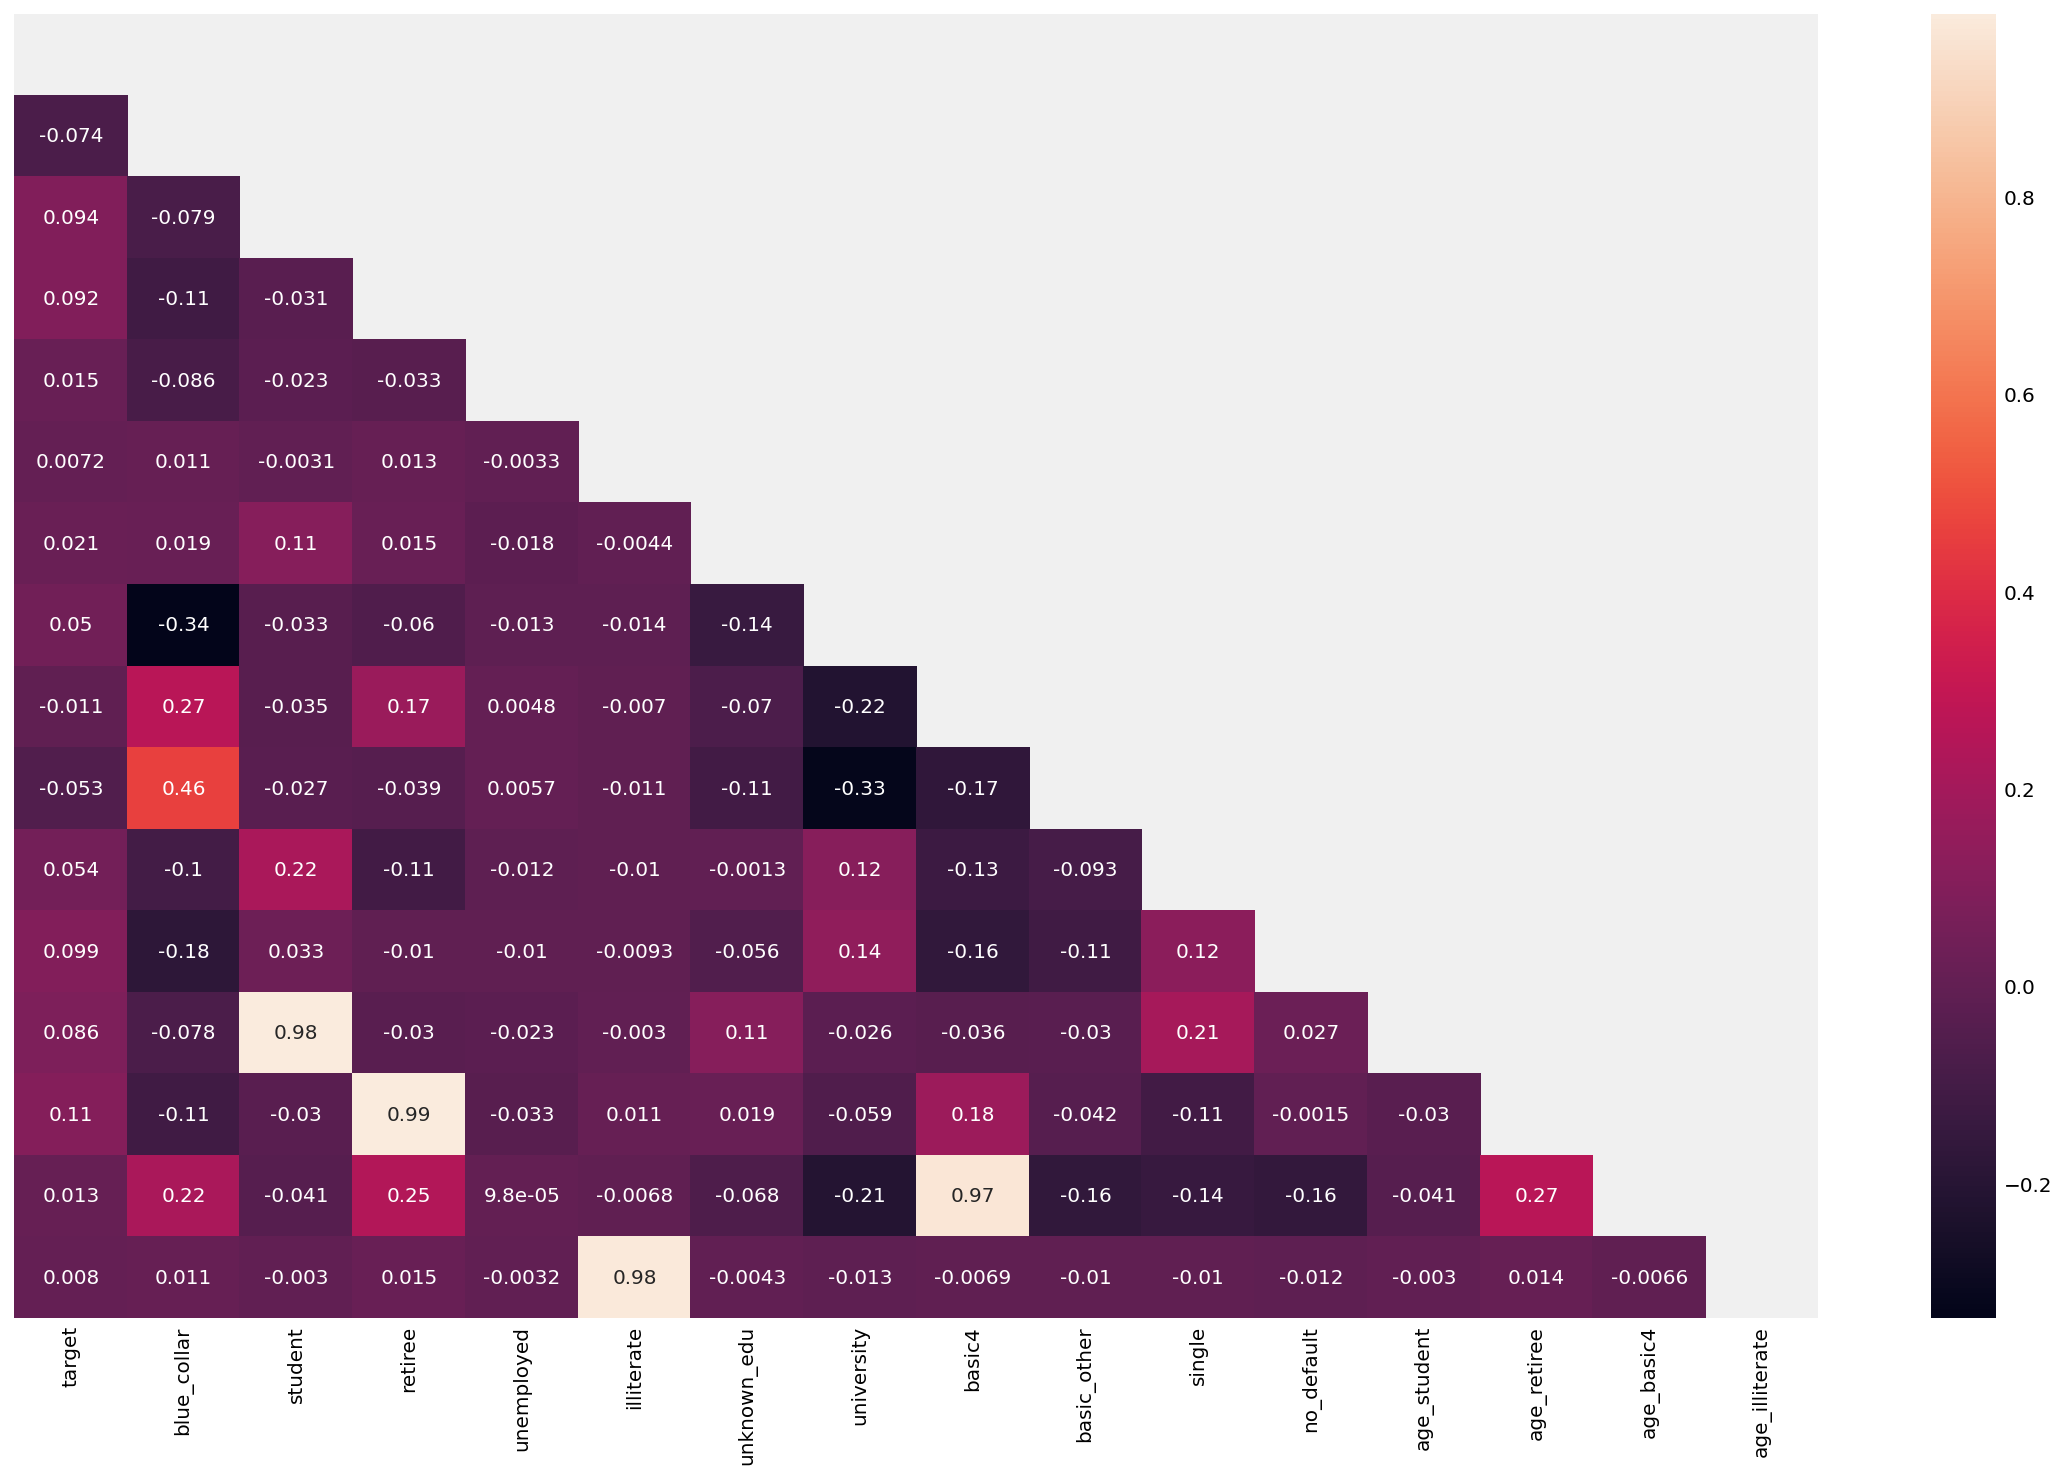

In [91]:
# Take a look at the correlation matrix for the new variables
W = df[['target', 'blue_collar', 'student', 'retiree', 'unemployed', 'illiterate', 'unknown_edu', 
        'university', 'basic4', 'basic_other', 'single', 'no_default', 'age_student', 'age_retiree', 'age_basic4',
        'age_illiterate']]

fig, ax = plt.subplots(figsize=(18, 12))

mask = np.zeros_like(W.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(W.corr(), mask=mask, annot=True, ax=ax)
ax.set_yticks(np.arange(0, df.shape[1])+0.1)
ax.set_ylim([W.shape[1], 0])
plt.show()

#### The correlations tend to be low for these new set of mostly dummy variables, apart from the four interaction variables, which would be expected. The highest correlation is between 'basic_other and 'blue_collar' at +0.46, which we have already seen previously. After that it's a couple of correlations in the low 0.30s.

In [92]:
# Dropping continuous variables from the DF
df.drop(['emp.var.rate', 'nr.employed', 'cons.price.idx', 'pdays'], axis=1, inplace=True)

In [93]:
# Dropping the categorial variables from the DF after engineering above
df.drop(['job', 'education', 'marital', 'default', 'housing', 'loan'], axis=1, inplace=True)

### Dummifying the rest of the variables

In [94]:
df = pd.get_dummies(df, columns=['poutcome'], drop_first=True)

In [95]:
df = pd.get_dummies(df, columns=['contact'], drop_first=True)

In [96]:
df = pd.get_dummies(df, columns=['month'], drop_first=True)

In [97]:
df = pd.get_dummies(df, columns=['day_of_week'], drop_first=True)

In [98]:
df.columns

Index(['age', 'duration', 'campaign', 'previous', 'cons.conf.idx', 'euribor3m',
       'target', 'blue_collar', 'student', 'retiree', 'unemployed',
       'illiterate', 'unknown_edu', 'university', 'basic4', 'basic_other',
       'single', 'no_default', 'age_retiree', 'age_student', 'age_basic4',
       'age_illiterate', 'poutcome_nonexistent', 'poutcome_success',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed'],
      dtype='object')

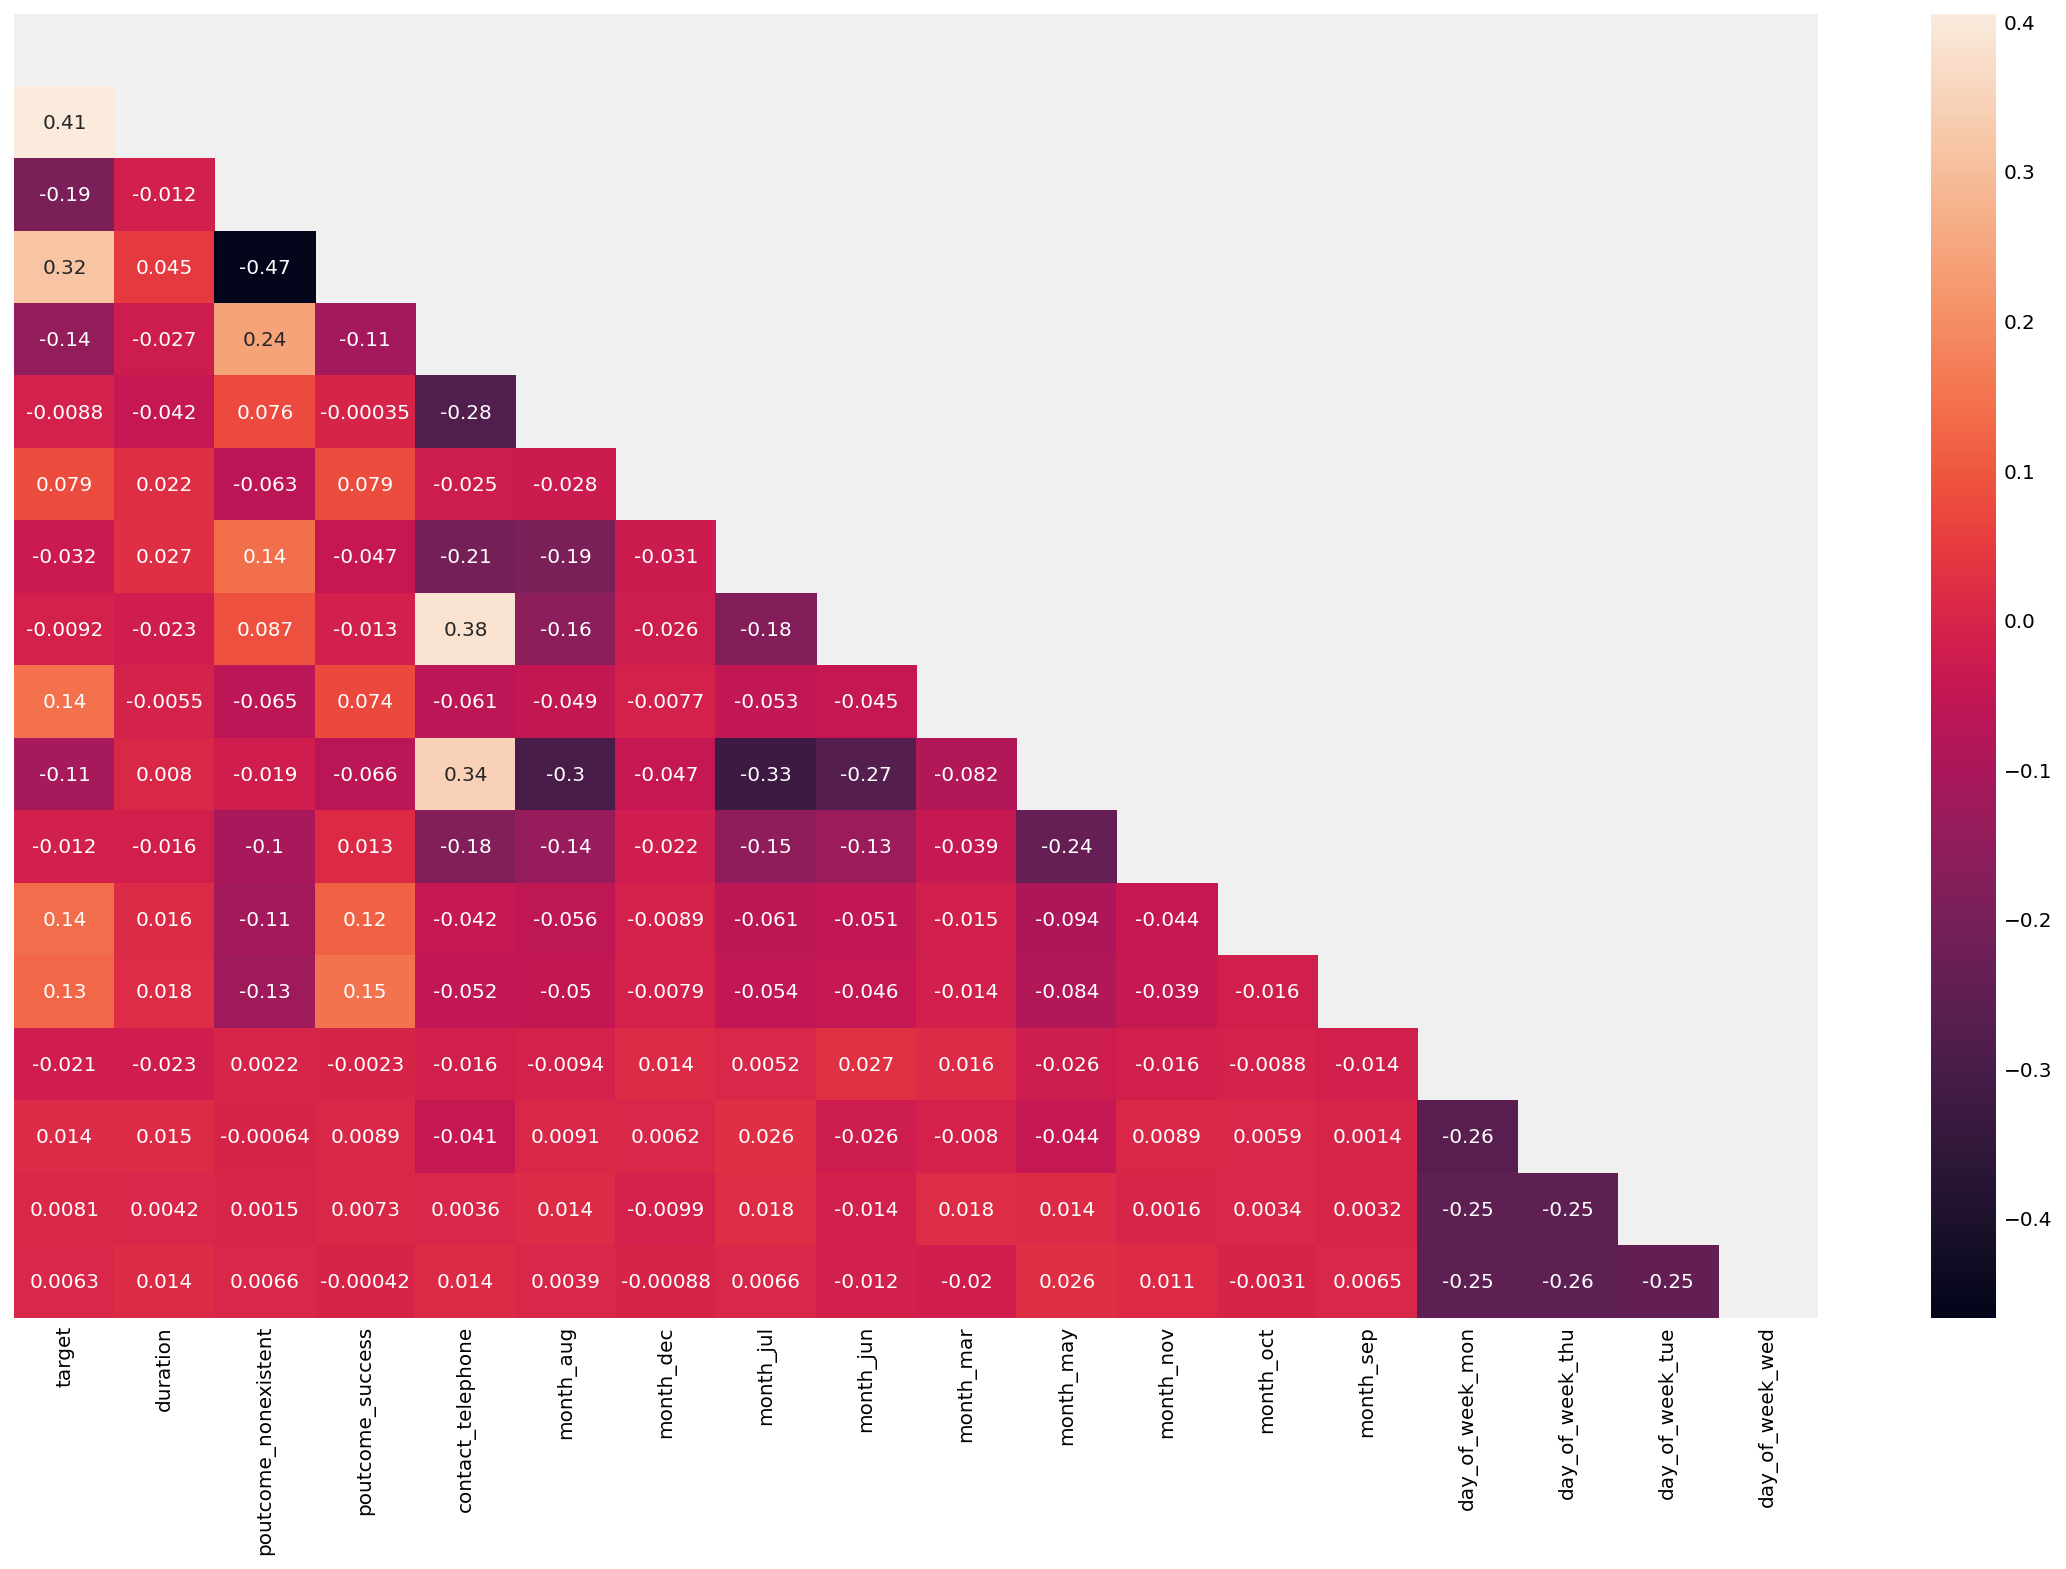

In [99]:
# Take a look at the correlation matrix for the new variables
Q = df[['target', 'duration', 'poutcome_nonexistent', 'poutcome_success', 'contact_telephone', 'month_aug', 
        'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 
        'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed']]

fig, ax = plt.subplots(figsize=(18, 12))

mask = np.zeros_like(Q.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(Q.corr(), mask=mask, annot=True, ax=ax)
ax.set_yticks(np.arange(0, df.shape[1])+0.1)
ax.set_ylim([Q.shape[1], 0])
plt.show()

The correlations tend to be **low** for these remaining set of variables. The **highest correlation** is again between the **two 'poutcome' dummies**, which would be expected, then between 'target' and 'duration'. After that it's a handful of correlations in the 0.30s, largely between the 'contact_telephone' dummy and a couple of months.

In [100]:
df.drop(['duration'], axis=1, inplace=True)

In [101]:
df.columns

Index(['age', 'campaign', 'previous', 'cons.conf.idx', 'euribor3m', 'target',
       'blue_collar', 'student', 'retiree', 'unemployed', 'illiterate',
       'unknown_edu', 'university', 'basic4', 'basic_other', 'single',
       'no_default', 'age_retiree', 'age_student', 'age_basic4',
       'age_illiterate', 'poutcome_nonexistent', 'poutcome_success',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed'],
      dtype='object')

In [102]:
#df.to_csv(r'C:\\df_data.csv', index=False)

### The analysis is continued in the second file of the series